# Final Project: Penguin Species
***
![penguinsresize](penguinsresize.jpg)
***

## Project Topic
This project contains a dataset describing penguin species and their characteristics. After some exploratory data analysis, an unsupervised learning model using KMeans will be developed to cluster penguin data based on their characteristics.

### Data
The dataset contains penguin species and characteristics data from the [Long Term Ecological Research Network](https://lternet.edu/) and was obtained through [Kaggle](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data). The data is tabular with 7 features.

Overview of Features: 
* species- penguin species; either Chinstrap, Adélie, Gentoo
* island- island name
* culmen_length_mm- length of culmen, or penguin bill
* culmen_depth_mm- depth of penguin culmen
* flipper_length_mm- length of penguin flipper
* body_mass_g- body mass of penguin
* sex- sex of penguin

###### Citations:

<br>
Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081
<br>
<br>
Climate change is directly affecting the Penguin population. (2016, April 26). Www.pulseheadlines.com. https://www.pulseheadlines.com/climate-change-is-directly-affecting-the-penguin-population/27828/


###### GitHub Repository Link:
https://github.com/mcdatbuff/UnsupervisedFinal.git

In [404]:
# Import packages 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, accuracy_score, classification_report, precision_score, confusion_matrix, roc_curve, auc, mean_squared_error, recall_score, f1_score

In [286]:
# Import data and display first 5 rows
df = pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


***
### Exploratory Data Analyisis (EDA)
***

Some information about the dataframe and datatypes of each feature:

In [287]:
# Display variable types and dataframe dimensions
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Summary statistics for each numerical feature:

In [288]:
# Display descriptive statistics
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


##### Data Cleaning: 

There were 2 rows with null values that I removed.

In [289]:
# Display sum of nulls and remove
print("Nulls before:", df.isnull().sum())
df = df.dropna(how='any')
print("Nulls after:", df.isnull().sum())

Nulls before: species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64
Nulls after: species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [290]:
# Null check
df[df.isna().any(axis=1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


There were no duplicates in the data:

In [291]:
# Display duplicates 
dup_rows = df[df.duplicated()]
dup_rows

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


For the categorical values, I displayed each label. There was one row with a period value for sex instead of Male/Female, so it got removed: 

In [292]:
# Display category values
print(pd.unique(df['species']))
print(pd.unique(df['island']))
print(pd.unique(df['sex']))

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['MALE' 'FEMALE' '.']


In [293]:
# Delete row with .
df = df.drop(df[df.sex == '.'].index)

##### Display Categorical Features: 
Below are bar charts for the categorical values to look at the distribution of values. The distribution for species and island isn't very balanced, which may impact the model later. There is a pretty equal balance between Male/Female.

Text(0, 0.5, 'Count')

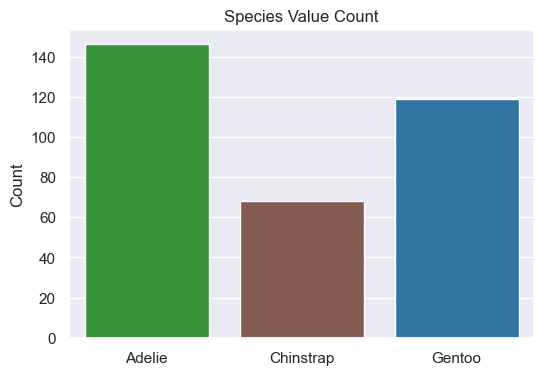

In [294]:
# Species
palette = ['tab:green','tab:brown', 'tab:blue']
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='species', palette=palette)
plt.title('Species Value Count')
plt.xlabel('')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

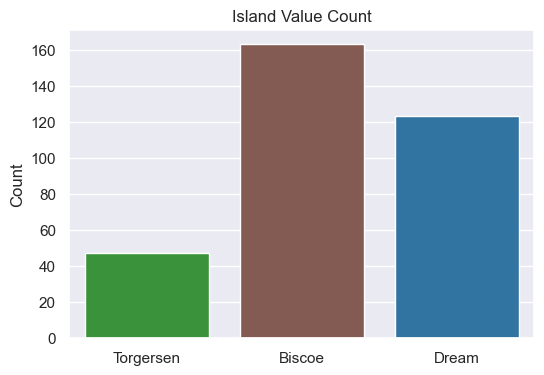

In [396]:
# Island 
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='island', palette=palette)
plt.title('Island Value Count')
plt.xlabel('')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

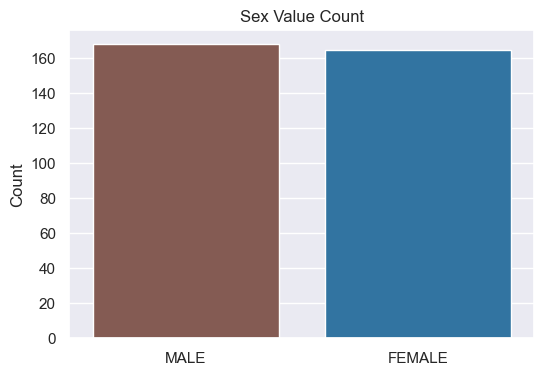

In [397]:
# Sex
palette = ['tab:brown', 'tab:blue']
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sex', palette=palette)
plt.title('Sex Value Count')
plt.xlabel('')
plt.ylabel('Count')

##### Display Numerical Features: 
The pairplot below displays relationships between the features. There appears to be a strong correlation between flipper length and body mass. There may be a potential correlation betwen culmen length ad flipper/body mass. The differing peaks among histograms, such as in flipper length, indicate that the flipper feature may be useful in classifying Adelie/Chinstrap vs Gentoo.

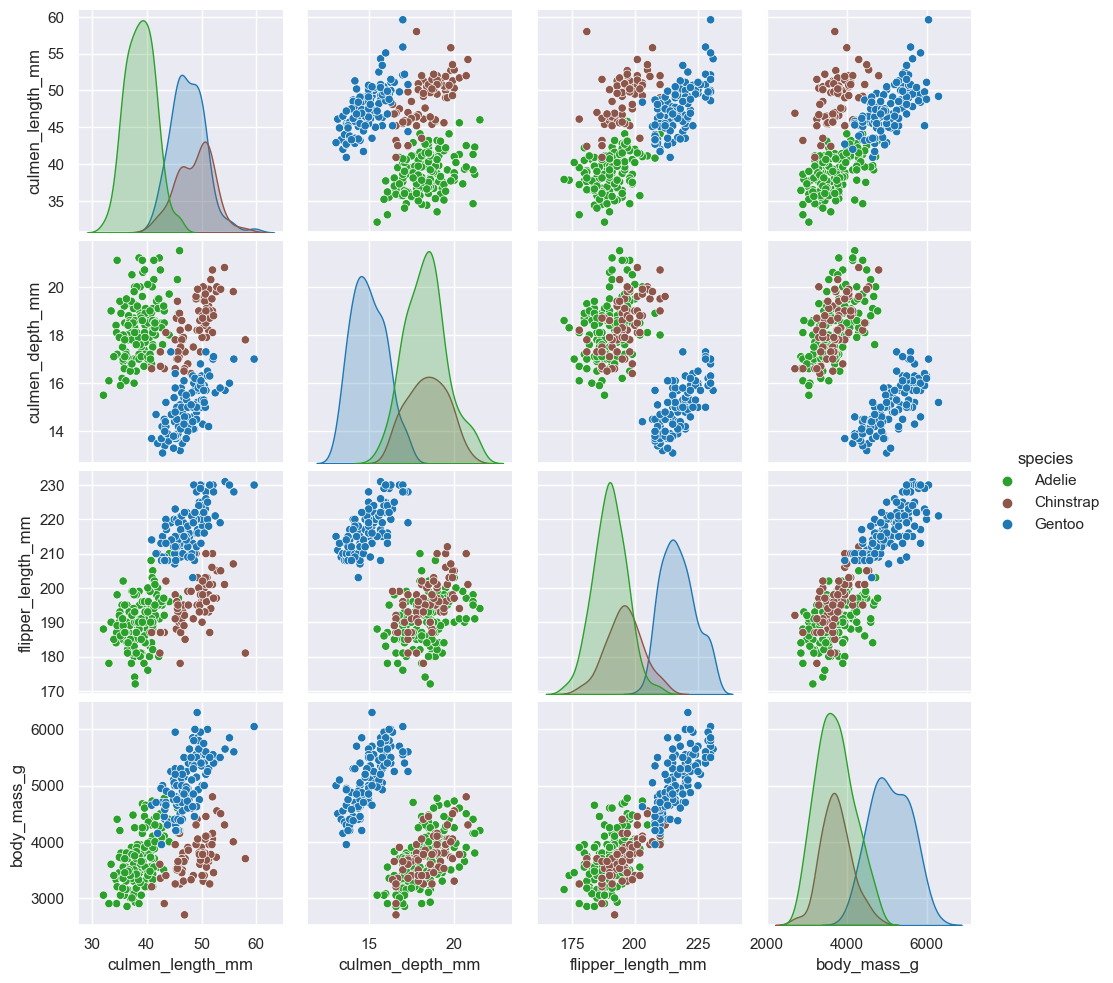

In [296]:
palette = ['tab:green','tab:brown', 'tab:blue']
# List of numerical features 
labels = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
# Pairplot of features 
sns.pairplot(df, hue = 'species', vars=labels, diag_kind = 'kde', palette=palette)

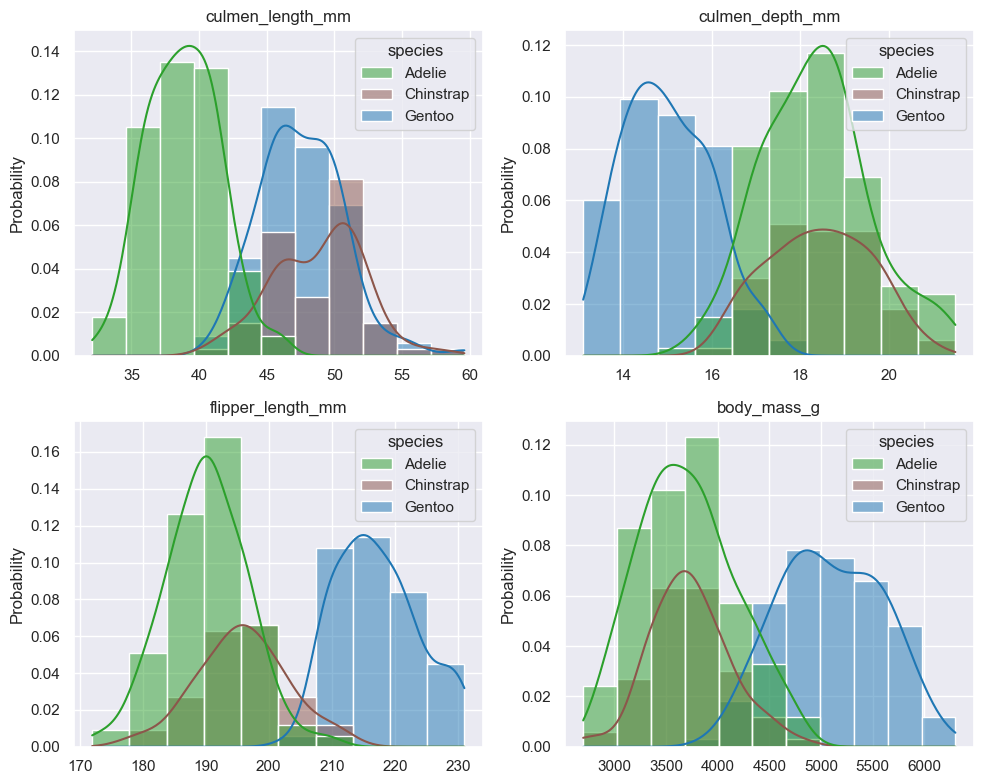

In [297]:
# Histograms of features
sns.set() 
plt.figure(figsize=(10, 8))
for f, feature in enumerate(labels,1):
    plt.subplot(2, 2, f)
    ax = sns.histplot(data=df, x=feature, hue='species', stat='probability', kde=True, palette=palette).set(xlabel='')
    plt.tight_layout()
    plt.title(feature)

#### Convert Categorical Values to Numeric
I added numeric values for the categorical features to be used in the correlation matrix and models.

In [336]:
# Add SpeciesVal column
df['SpeciesVal'] = np.nan
# Add values of SpeciesVal column
df['SpeciesVal'] = df['species'].mask(df.species == 'Adelie', 0).mask(df.species == 'Chinstrap', 1).mask(df.species == 'Gentoo', 2)\
# Convert SpeciesVal column to numeric 
df['SpeciesVal'] = pd.to_numeric(df['SpeciesVal'])
# Add IslandVal column 
df['IslandVal'] = np.nan
# Add values of IslandVal column
df['IslandVal'] = df['island'].mask(df.island == 'Torgersen', 0).mask(df.island == 'Biscoe', 1).mask(df.island == 'Dream', 2)\
# Convert IslandVal column to numeric 
df['IslandVal'] = pd.to_numeric(df['IslandVal'])
# Add SexVal column 
df['SexVal'] = np.nan
# Add values of SexVall column
df['SexVal'] = df['sex'].mask(df.sex == 'MALE', 0).mask(df.sex == 'FEMALE', 1)\
# Convert SexVal column to numeric 
df['SexVal'] = pd.to_numeric(df['SexVal'])

# make copy and remove old columns 
penguins = df.copy()
penguins = penguins.drop(columns=['species', 'island', 'sex'])
penguins = penguins.rename(columns={'SpeciesVal': 'species', 'IslandVal': 'island', 'SexVal' : 'sex'})
psup = penguins.copy()
penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species,island,sex
0,39.1,18.7,181.0,3750.0,0,0,0
1,39.5,17.4,186.0,3800.0,0,0,1
2,40.3,18.0,195.0,3250.0,0,0,1
4,36.7,19.3,193.0,3450.0,0,0,1
5,39.3,20.6,190.0,3650.0,0,0,0
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,2,1,1
340,46.8,14.3,215.0,4850.0,2,1,1
341,50.4,15.7,222.0,5750.0,2,1,0
342,45.2,14.8,212.0,5200.0,2,1,1


#### Correlations:
The correlation matrix indicates a high positive correlation of 0.87 between flipper length and body mass, which is verified by looking at the scatterplot for those features above. The values of 0.65 and 0.59 indicate a moderate positive relationship between culmen length/flipper length and culmen length/body mass. There is also a moderate negative relationship between culmen depth/flipper length. When considering the question of predicting species, there are strong correlations between species and culmen length, culmen depth, flipper length, and body mass. 

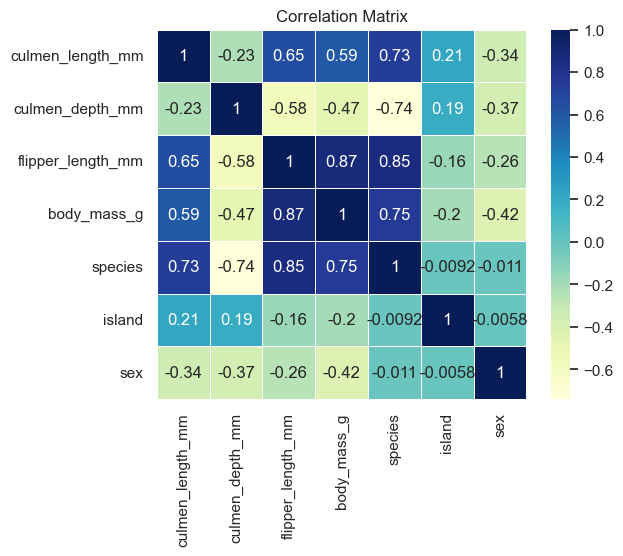

In [299]:
# make correlation matrix
correlation_matrix = penguins.corr()
# diplay
sns.heatmap(correlation_matrix, annot=True, cmap = "YlGnBu", square=True, linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

#### Data Transformation
StandardScaler was used to scale each column since the range of values was different: 

In [406]:
# data transform
scaler = StandardScaler()
X = scaler.fit_transform(penguins)
penguins = pd.DataFrame(data=X, columns=penguins.columns)
penguins = penguins.drop('species', axis=1)
penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island,sex,cluster3,cluster1,cluster2
0,-0.896042,0.780732,-1.426752,-0.568475,-1.814037,-0.991031,-1.176944,1.192835,-1.176944
1,-0.822788,0.119584,-1.069474,-0.506286,-1.814037,1.009050,-1.176944,1.192835,-1.176944
2,-0.676280,0.424729,-0.426373,-1.190361,-1.814037,1.009050,1.314088,-1.279452,1.314088
3,-1.335566,1.085877,-0.569284,-0.941606,-1.814037,1.009050,1.314088,1.192835,1.314088
4,-0.859415,1.747026,-0.783651,-0.692852,-1.814037,-0.991031,-1.176944,1.192835,-1.176944


***
### Unsupervised Model- K-Means Clustering
***

##### Determine optimal number of clusters
Before implementing the K-Means clustering model, I iterated through values of k and calculated the inertia for each value. The sharpest point of the 'elbow' is at 4 clusters, so 4 will be used as the optimal number of clusters. 

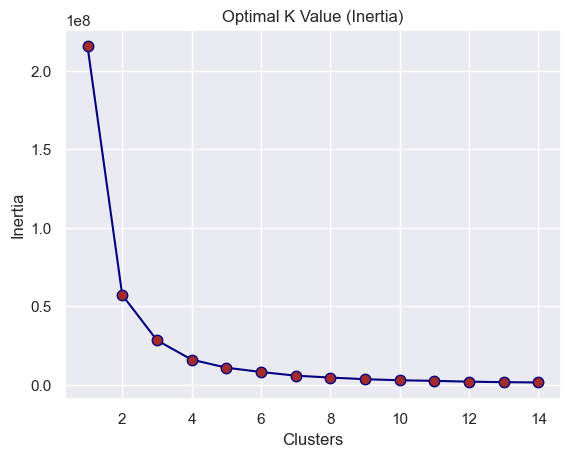

In [394]:
# kmeans iteration to find optimal k
val = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(penguins)
    val.append(kmeans.inertia_)
    plt.plot(range(1,15), val, marker=".", markersize=15, markerfacecolor='brown', color='navy')
plt.ylabel('Inertia')
plt.xlabel("Clusters")
plt.title("Optimal K Value (Inertia)")
plt.show()

##### KMeans Model
I used the correlation matrix to create 3 different subsets of data and compare how well the kmeans clustering models work. I fit 3 different kmeans models and added a cluster column for each to the dataframe.

In [407]:
# feature subsets
feat1 = penguins[['culmen_length_mm', 'flipper_length_mm']]
feat2 = penguins[['body_mass_g', 'flipper_length_mm']]
feat3 = penguins[['culmen_length_mm', 'body_mass_g']]
# kmeans models
kmeans1 = KMeans(n_clusters=4, random_state=3)
penguins['cluster1'] = kmeans1.fit_predict(feat1)
kmeans2 = KMeans(n_clusters=4, random_state=3)
penguins['cluster2'] = kmeans2.fit_predict(feat2)
kmeans3 = KMeans(n_clusters=4, random_state=3)
penguins['cluster3'] = kmeans3.fit_predict(feat3)
penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island,sex,cluster3,cluster1,cluster2
0,-0.896042,0.780732,-1.426752,-0.568475,-1.814037,-0.991031,0,0,0
1,-0.822788,0.119584,-1.069474,-0.506286,-1.814037,1.009050,0,0,0
2,-0.676280,0.424729,-0.426373,-1.190361,-1.814037,1.009050,0,0,0
3,-1.335566,1.085877,-0.569284,-0.941606,-1.814037,1.009050,0,0,0
4,-0.859415,1.747026,-0.783651,-0.692852,-1.814037,-0.991031,0,0,0
...,...,...,...,...,...,...,...,...,...
328,0.587352,-1.762145,0.931283,0.892957,-0.337083,1.009050,3,3,1
329,0.514098,-1.457000,1.002739,0.799674,-0.337083,1.009050,3,3,1
330,1.173384,-0.744994,1.502928,1.919069,-0.337083,-0.991031,2,1,3
331,0.221082,-1.202712,0.788372,1.234995,-0.337083,1.009050,3,3,1


##### Graphical Results
Below are scatterplots of each kmeans cluster result. The third one, which clustered by flipper vs culmen length didn't appear to perform as well as the other two. 

Text(0, 0.5, 'Culmen Length (mm)')

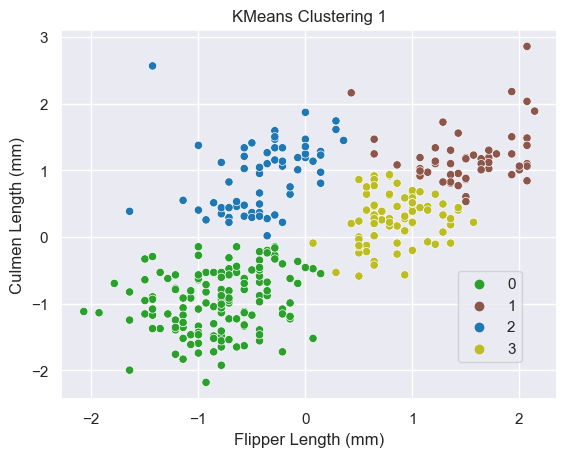

In [324]:
palette2 = palette = ['tab:green','tab:brown', 'tab:blue', 'tab:olive']
sns.scatterplot(data=penguins, x='flipper_length_mm', y='culmen_length_mm', hue='cluster1', palette=palette)
plt.legend(loc=(0.8,0.1))
plt.title('KMeans Clustering 1')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Culmen Length (mm)')

Text(0, 0.5, 'Flipper Length (mm)')

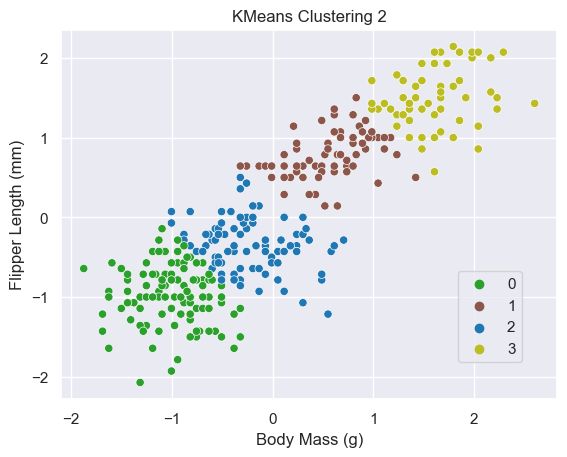

In [325]:
sns.scatterplot(data=penguins, x='body_mass_g', y='flipper_length_mm', hue='cluster2', palette=palette)
plt.legend(loc=(0.8,0.1))
plt.title('KMeans Clustering 2')
plt.xlabel('Body Mass (g)')
plt.ylabel('Flipper Length (mm)')

Text(0, 0.5, 'Culmen Length (mm)')

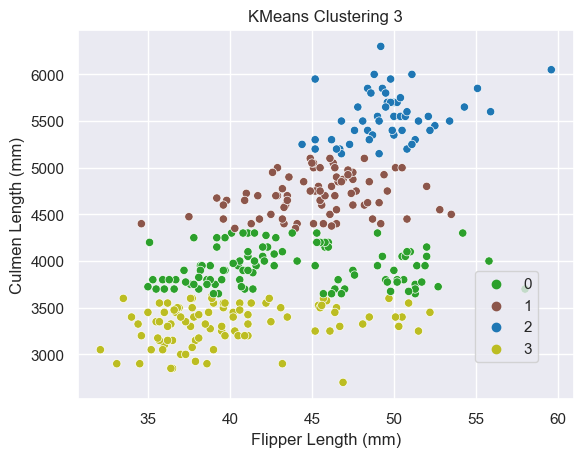

In [393]:
sns.scatterplot(data=penguins, x='culmen_length_mm', y='body_mass_g', hue='cluster3', palette=palette)
plt.legend(loc=(0.8,0.1))
plt.title('KMeans Clustering 3')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Culmen Length (mm)')

##### Compare to K-Nearest Neighbors Model (Supervised Learning)
I used a K-nearest neighbor supervised model see how well the model worked with classifying penguin species. I used the error rate over k's to determine the optimal number of neighbors to be 8. I printed the confusion matrix and accuracy score, which didn't perform as well as I anticipated. 

Text(0, 0.5, 'Error Rate')

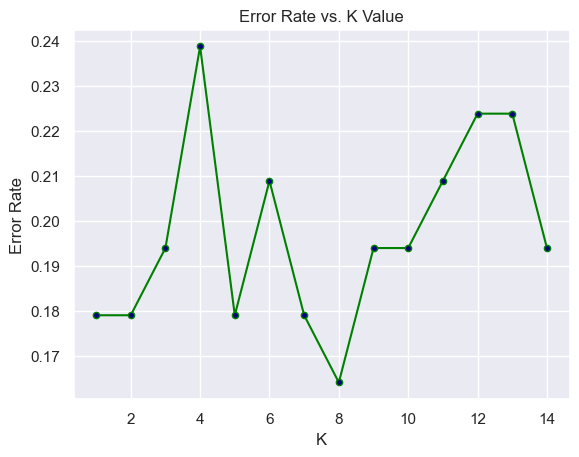

In [384]:
dfsup = df.copy()
dfsup = dfsup.drop(columns=['SpeciesVal', 'island', 'sex', 'Species'])
X = dfsup[dfsup.columns.drop(['species'])]
y = dfsup['species']
# 20/80 train test split
X_train , X_test , y_train , y_test = train_test_split(X, y, random_state=42,  test_size=0.2)
error = []
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error.append(np.mean(pred != y_test))
plt.plot(range(1,15),error,color='green',marker='.',markerfacecolor='navy', markersize=9)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [408]:
# Make model and calculate statistics 
kmod = KNeighborsClassifier(n_neighbors=8).fit(X_train,y_train)
k_pred = kmod.predict(X_test)
kacc = accuracy_score(y_test, k_pred)
kconf = confusion_matrix(y_test, k_pred)
print("Confusion Matrix:")
print(kconf)
print(" ")
print("Accuracy", round(kacc,4))

Confusion Matrix:
[[29  0  2]
 [ 8  5  0]
 [ 1  0 22]]
 
Accuracy 0.8358


***
### Conclusion
***
After looking at the k-means cluster results, it appeared to do pretty well clustering by various penguin characteristics. The lack of balance of the data for island and species type wasn't a factor because it wasn't included for those clustering techniques. 

A possible improvement would have been to try some other methods to determine the optimal k value for kmeans beyond the elbow method. The supervised model didn't have a great accuracy, which I suspect is due to how similar certain species are by each characteric. 